https://www.kaggle.com/c/data-science-london-scikit-learn

# Import Libraries, Data and EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_features = pd.read_csv('train.csv', header=None)
test_features = pd.read_csv('test.csv', header=None)
train_label = pd.read_csv('trainLabels.csv', header=None)

In [3]:
train_features.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332


In [4]:
train_label.columns = ['label']
train_label.head()

,label
0,1
1,0
2,0
3,1
4,0


In [5]:
print(train_features.shape)
print(train_label.shape)
print(test_features.shape)

(1000, 40)
(1000, 1)
(9000, 40)


In [6]:
train_features = pd.concat([train_features, train_label], axis=1)

In [7]:
train_features.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,label
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050,1
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761,0
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436,0
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397,1
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332,0


# EDA

-----0-----


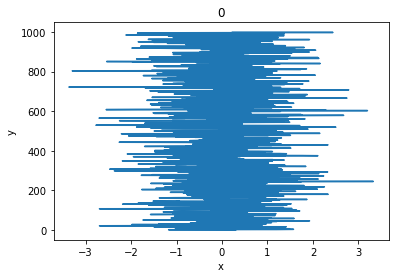

0.1 quantile -3.293045931956035
99.9 quantile -1.266750178379481

-----1-----


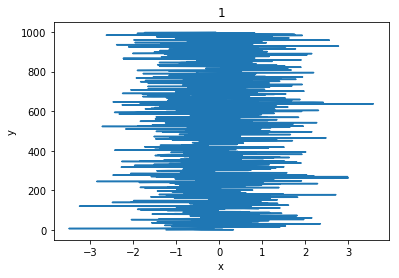

0.1 quantile -3.2463937608762805
99.9 quantile -1.3534347821248116

-----2-----


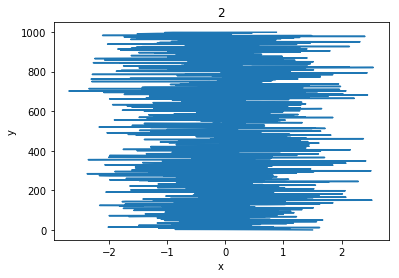

0.1 quantile -2.3827440756502125
99.9 quantile -1.3212328381290277

-----3-----


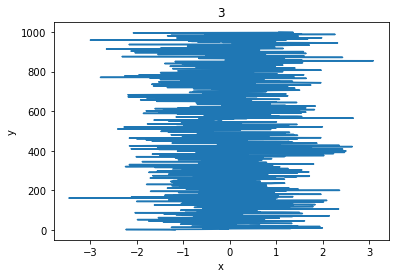

0.1 quantile -2.9999633509900856
99.9 quantile -1.2569336463819343

-----4-----


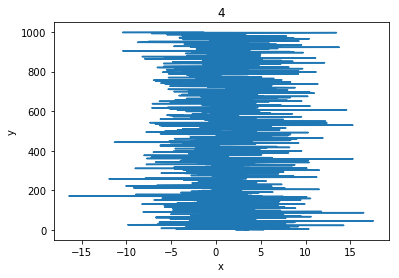

0.1 quantile -11.953170318750297
99.9 quantile -4.617562967916405

-----5-----


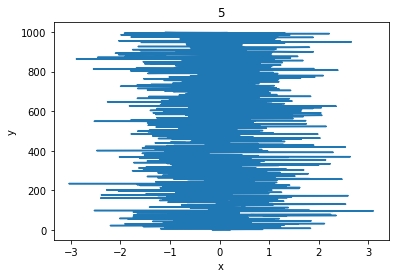

0.1 quantile -2.891563459341567
99.9 quantile -1.2669198664260037

-----6-----


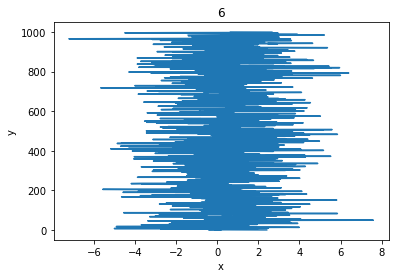

0.1 quantile -5.6757989310015855
99.9 quantile -2.31046367906375

-----7-----


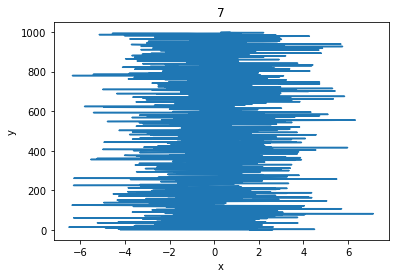

0.1 quantile -6.369713884756997
99.9 quantile -2.8821520879434823

-----8-----


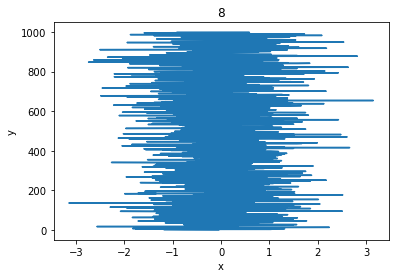

0.1 quantile -2.739838596785527
99.9 quantile -1.293284241899435

-----9-----


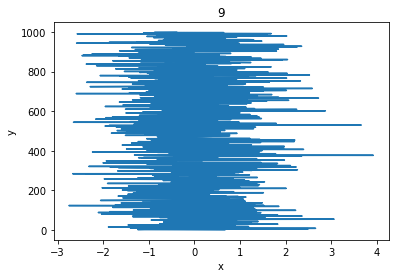

0.1 quantile -2.665632035708564
99.9 quantile -1.2678429165271472

-----10-----


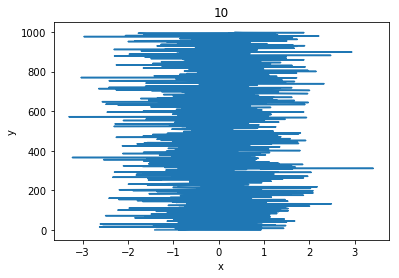

0.1 quantile -3.228435542748267
99.9 quantile -1.3775793323534349

-----11-----


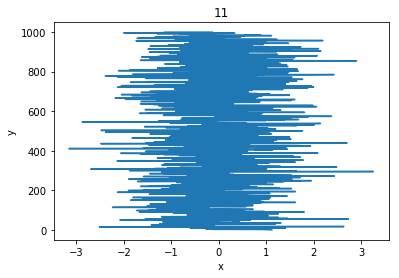

0.1 quantile -2.878323126250827
99.9 quantile -1.300440519475678

-----12-----


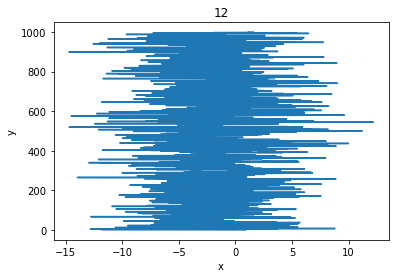

0.1 quantile -14.679075168249632
99.9 quantile -7.627858711252476

-----13-----


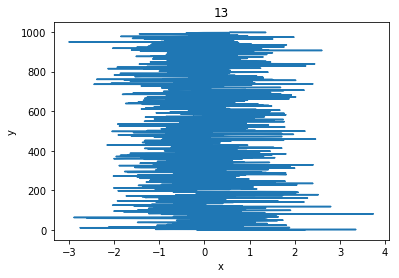

0.1 quantile -2.89281766497079
99.9 quantile -1.2708070445573478

-----14-----


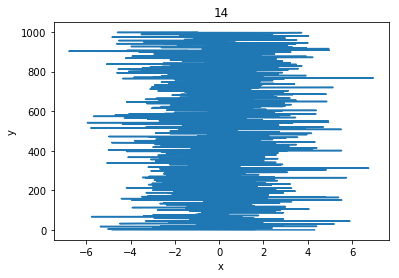

0.1 quantile -5.962718276288189
99.9 quantile -2.8156852064584084

-----15-----


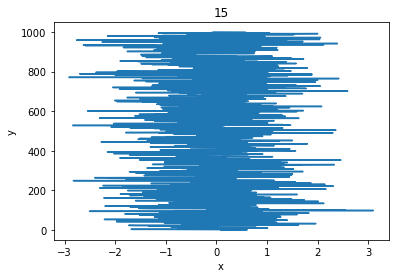

0.1 quantile -2.8398841132317325
99.9 quantile -1.3076156309322386

-----16-----


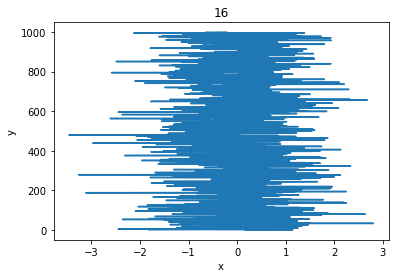

0.1 quantile -3.2643996735840775
99.9 quantile -1.2768476291395063

-----17-----


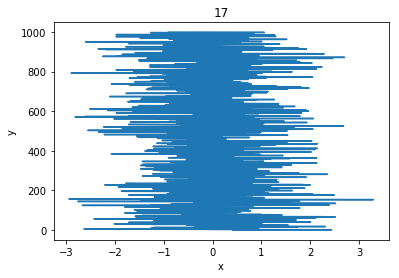

0.1 quantile -2.898514281295626
99.9 quantile -1.3189525174111998

-----18-----


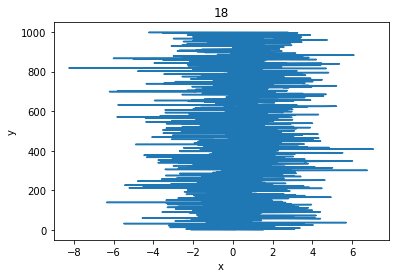

0.1 quantile -6.3606344815091544
99.9 quantile -2.3969892594064905

-----19-----


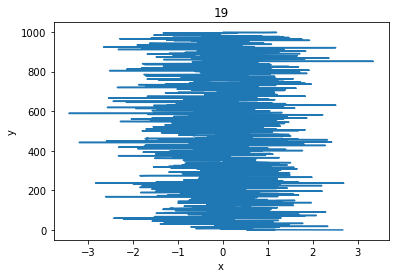

0.1 quantile -3.19666366264402
99.9 quantile -1.2514635745284652

-----20-----


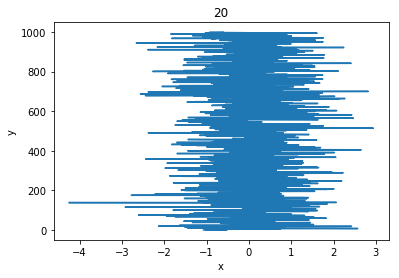

0.1 quantile -2.922468111989108
99.9 quantile -1.127747803235236

-----21-----


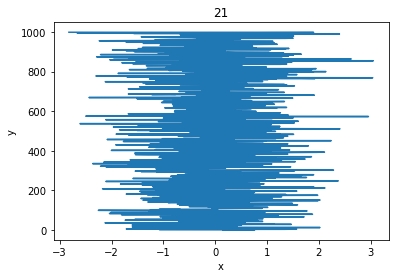

0.1 quantile -2.6670839129849755
99.9 quantile -1.2467709018364002

-----22-----


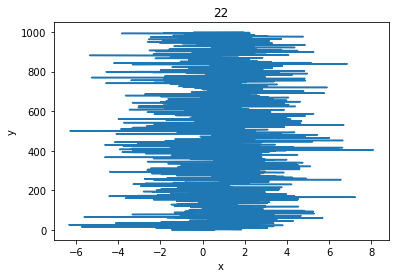

0.1 quantile -6.287089742370608
99.9 quantile -1.9265970099014873

-----23-----


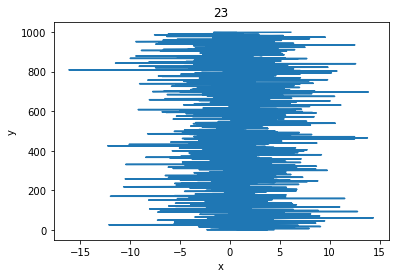

0.1 quantile -12.26428119817357
99.9 quantile -4.5259234772577335

-----24-----


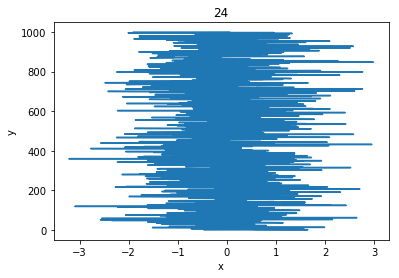

0.1 quantile -3.0974368267397283
99.9 quantile -1.3291285882052974

-----25-----


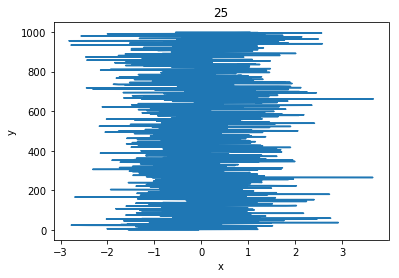

0.1 quantile -2.77705502990539
99.9 quantile -1.2630607961954001

-----26-----


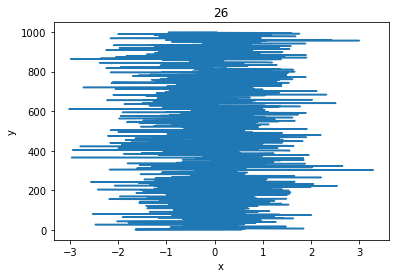

0.1 quantile -2.988297182952251
99.9 quantile -1.3360684607858406

-----27-----


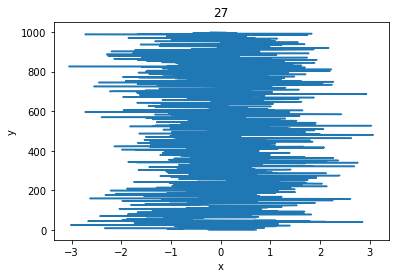

0.1 quantile -3.0176926596927096
99.9 quantile -1.3030362203886077

-----28-----


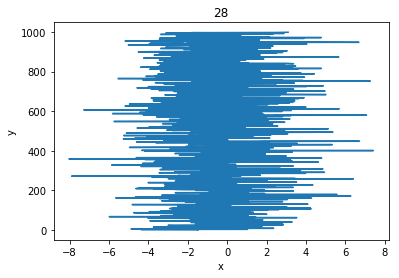

0.1 quantile -7.894151929273628
99.9 quantile -3.3285825302128513

-----29-----


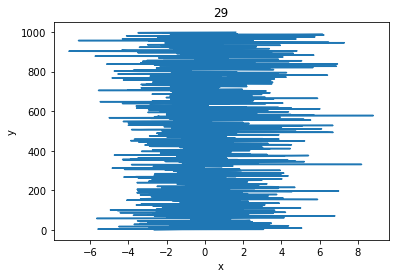

0.1 quantile -6.60661819330501
99.9 quantile -2.8481034582773455

-----30-----


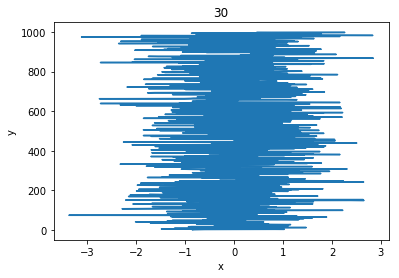

0.1 quantile -3.1214525944808136
99.9 quantile -1.2927096264625437

-----31-----


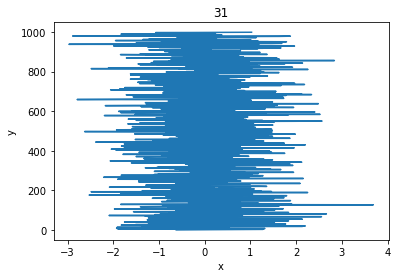

0.1 quantile -2.8888393774339556
99.9 quantile -1.30702663696913

-----32-----


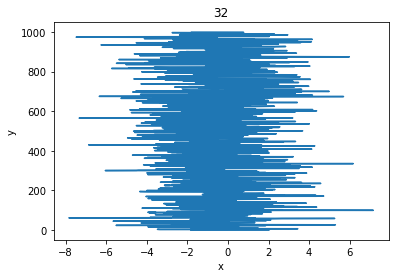

0.1 quantile -7.485292292981881
99.9 quantile -3.3829508150005094

-----33-----


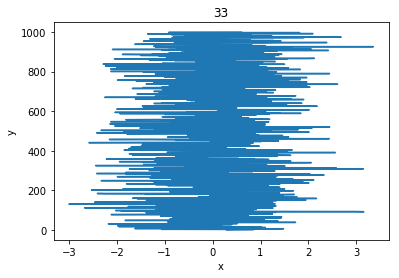

0.1 quantile -2.6740892879313485
99.9 quantile -1.3082499388694666

-----34-----


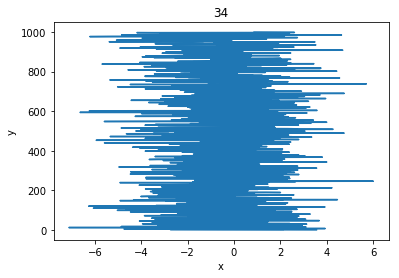

0.1 quantile -6.646417428039401
99.9 quantile -3.3509193945817692

-----35-----


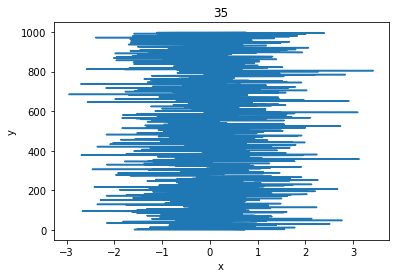

0.1 quantile -2.703110166890474
99.9 quantile -1.2753757785789852

-----36-----


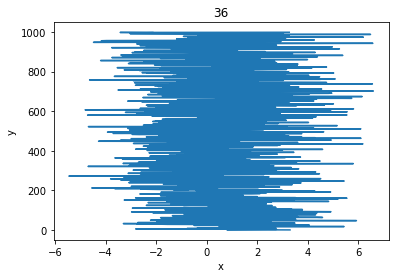

0.1 quantile -4.812351131533096
99.9 quantile -2.3605537171310313

-----37-----


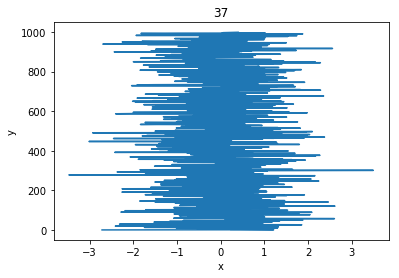

0.1 quantile -3.0152675904178503
99.9 quantile -1.2806991915932016

-----38-----


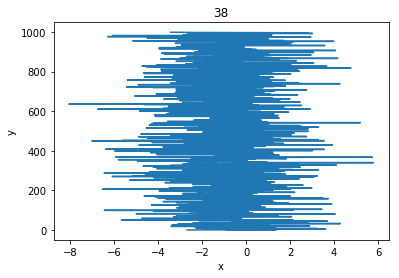

0.1 quantile -7.010893171402427
99.9 quantile -3.377847748975797

-----39-----


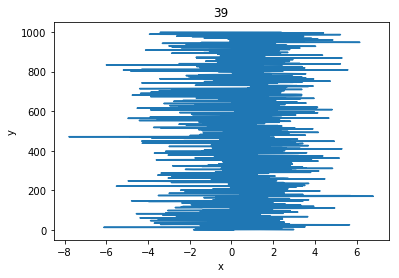

0.1 quantile -6.126249284874899
99.9 quantile -2.012357341508788



In [8]:
for i in range(40):
    x = train_features[i]
    y = range(1000)
    print('-----'+str(i)+'-----')
    plt.plot(x, y)
    plt.title(i)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    print('0.1 quantile', x.quantile(0.001))
    print('99.9 quantile', x.quantile(0.099))
    print()

# Removing Outliers

In [9]:
feat_outliers = train_features.copy()
for i in range(40):
    x = train_features[i]
    lower = x.quantile(0.001)
    upper = x.quantile(0.999)
    feat_outliers = feat_outliers[(feat_outliers[i] >= lower) & (feat_outliers[i] <= upper)]

In [10]:
feat_outliers.shape

(924, 41)

-----0-----


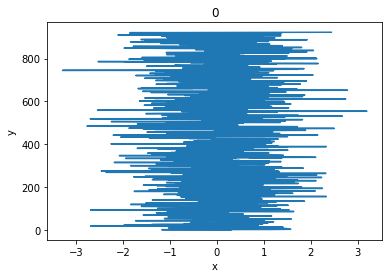


-----1-----


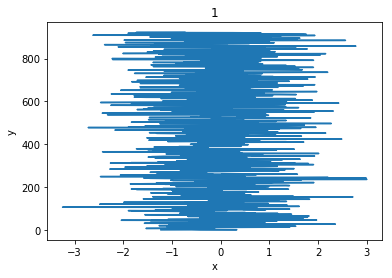


-----2-----


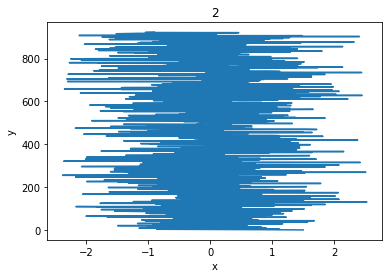


-----3-----


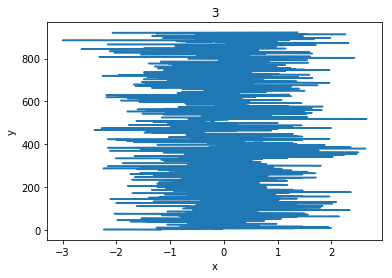


-----4-----


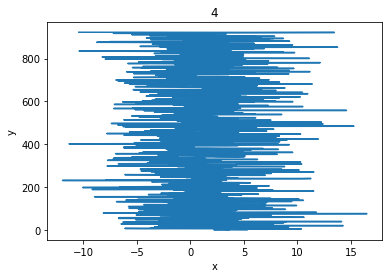


-----5-----


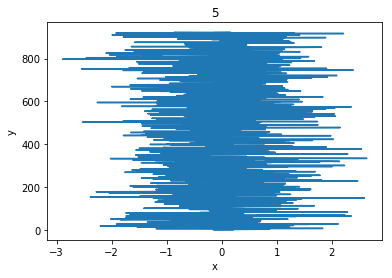


-----6-----


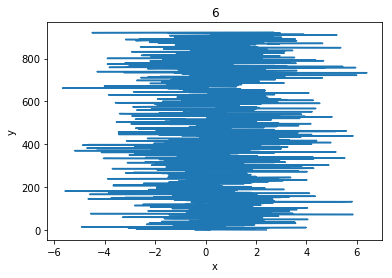


-----7-----


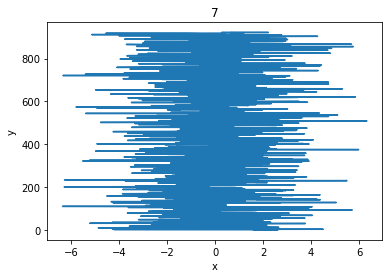


-----8-----


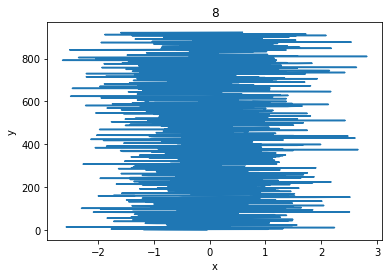


-----9-----


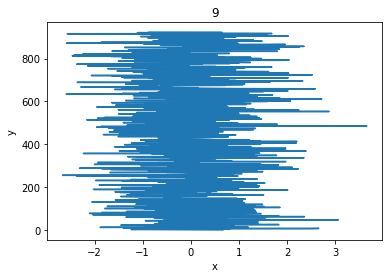


-----10-----


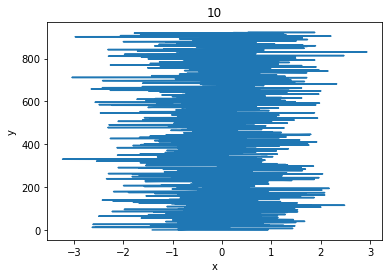


-----11-----


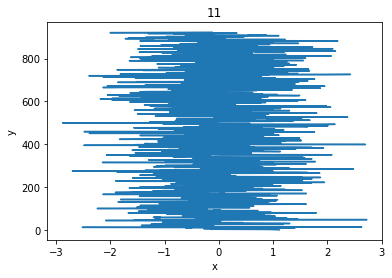


-----12-----


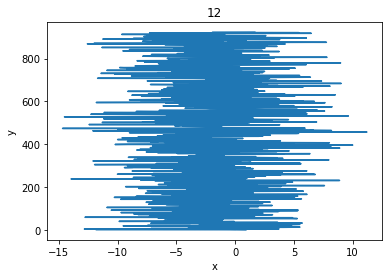


-----13-----


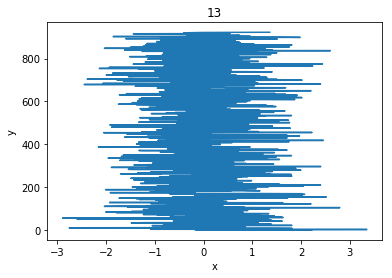


-----14-----


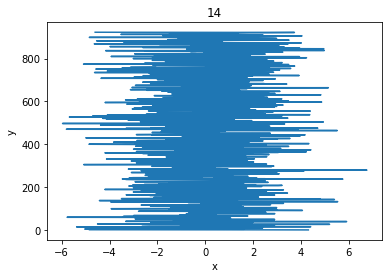


-----15-----


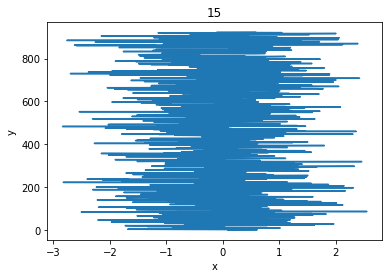


-----16-----


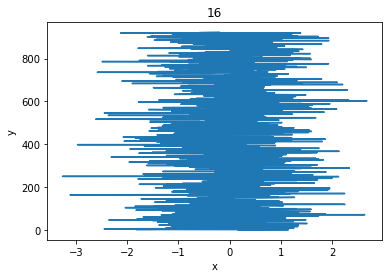


-----17-----


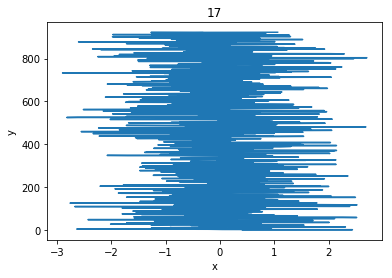


-----18-----


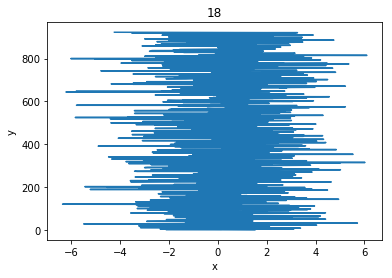


-----19-----


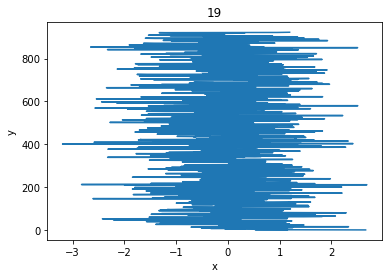


-----20-----


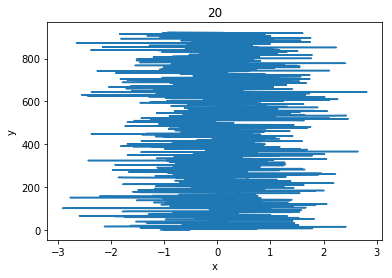


-----21-----


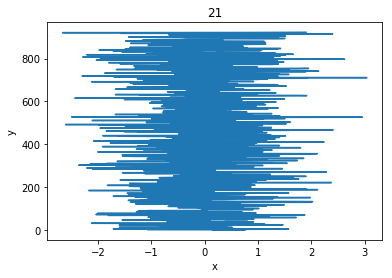


-----22-----


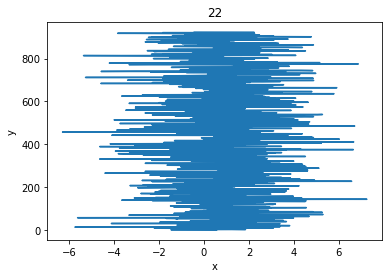


-----23-----


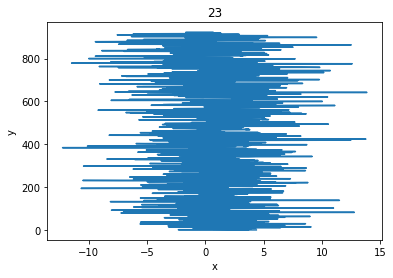


-----24-----


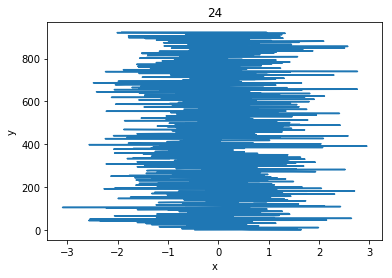


-----25-----


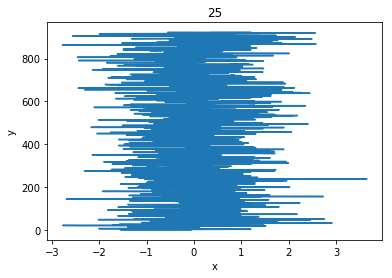


-----26-----


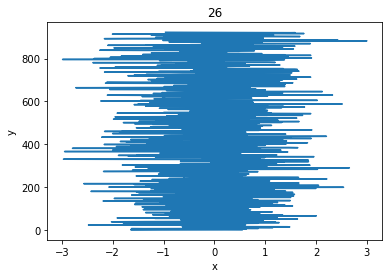


-----27-----


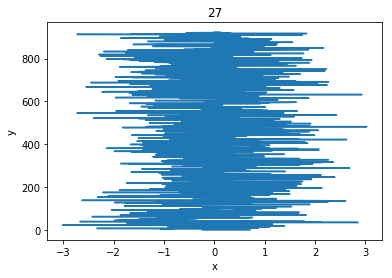


-----28-----


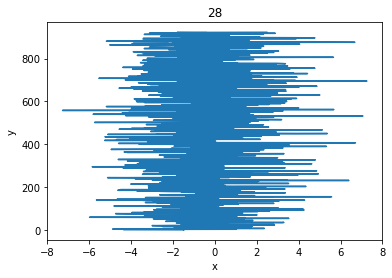


-----29-----


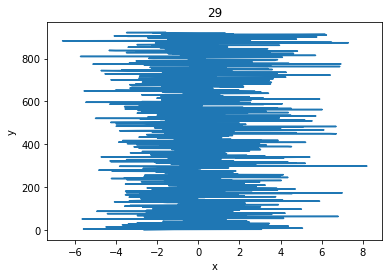


-----30-----


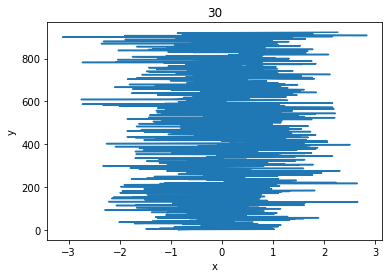


-----31-----


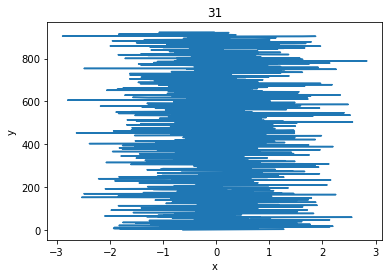


-----32-----


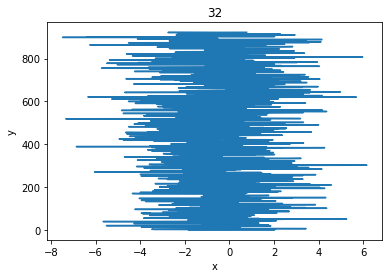


-----33-----


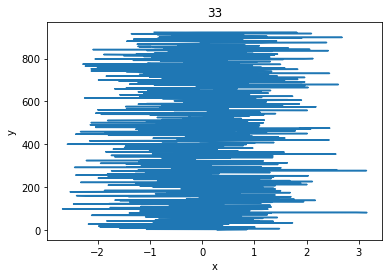


-----34-----


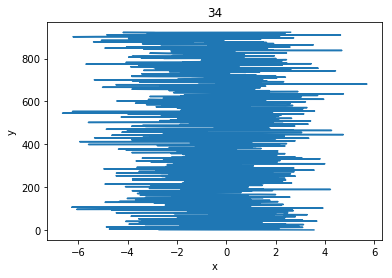


-----35-----


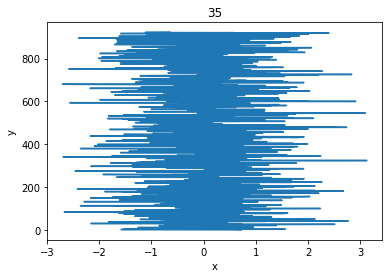


-----36-----


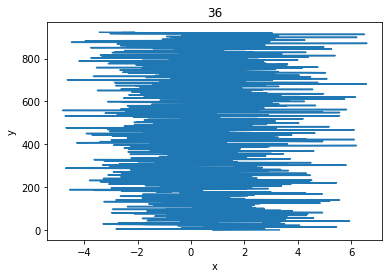


-----37-----


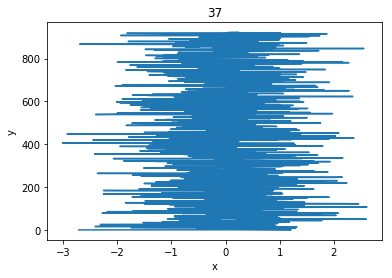


-----38-----


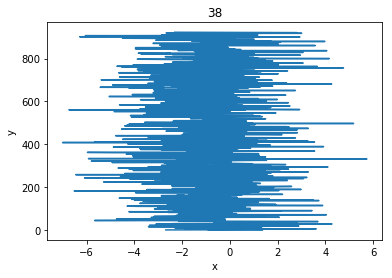


-----39-----


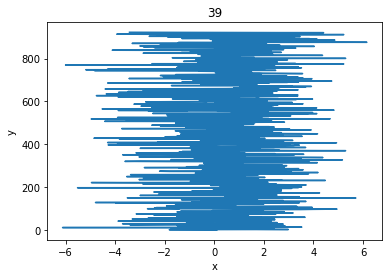

In [11]:
for i in range(40):
    x = feat_outliers[i]
    y = range(feat_outliers.shape[0])
    print('-----'+str(i)+'-----')
    plt.plot(x, y)
    plt.title(i)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
#     print('01 quantile', x.quantile(0.01))
#     print('99 quantile', x.quantile(0.99))
    print()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X1_train, X1_test, y1_train, y1_test = train_test_split(train_features.drop(['label'], axis=1),train_features['label'])

In [14]:
X2_train, X2_test, y2_train, y2_test = train_test_split(feat_outliers.drop(['label'], axis=1), feat_outliers['label'])

# Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

In [18]:
model1 = LogisticRegression()
model1.fit(X1_train, y1_train)
model1.score(X1_test, y1_test)

0.85599999999999998

In [19]:
model2 = LogisticRegression()
model2.fit(X2_train, y2_train)
model2.score(X2_test, y2_test)

0.81385281385281383